In [71]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [72]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [73]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [74]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)
# startdate = (2017, 6, 1)
# enddate = (2017, 6,30)
# june_month = dt.date(2017, 6,30)
# june_month = dt.date(2017, 6,30) - dt.timedelta(days =30)

In [75]:
#  3. Convert the June temperatures to a list.
june_results = june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [76]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
# june_results = session.query(Measurement.date, Measurement.tobs).filter((Measurement.date >= startdate) & (Measurement.date <=enddate)).all()
june_temp_df = pd.DataFrame(june_results, columns = ['date', 'tobs'])
#df.set_index(df['date'], inplace=True)
#df=df.sort_index()

In [77]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()
#df

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [78]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [79]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [80]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_results, columns = ['date', 'December Temps'])

In [81]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


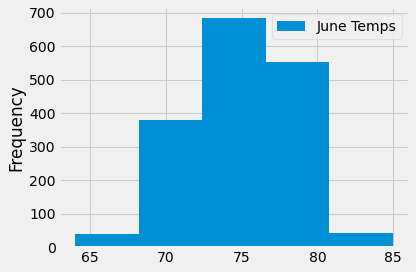

In [88]:
june_temps_df = pd.DataFrame(june_results, columns=['date','June Temps'])
june_temps_df.plot.hist(bins =5)
plt.tight_layout()

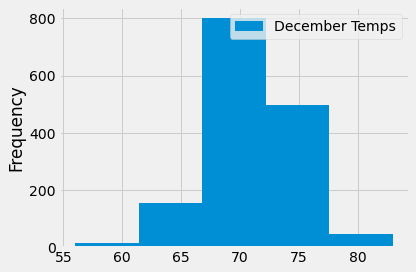

In [89]:
dec_temps_df = pd.DataFrame(dec_results, columns=['date','December Temps'])
dec_temps_df.plot.hist(bins =5)
plt.tight_layout()